# Анализ товарного ассортимента интернет-магазина

[**Презентация**](https://drive.google.com/file/d/1vJPrW7-pQB0m3hinhiY1FGg4ctPdVbwB/view?usp=sharing)


[**Дашборд**](https://public.tableau.com/views/2_16645710291430/Ordersdashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

Заказчик - менеджер проектов интернет-магазина товаров для дома и быта "Пока все ещё тут", отвечающий за актуальность ассортимента товаров. Необходимо исследовать товарный каталог магазина с целью оптимизации процесса закупок и повышения уровня продаж "вспомогательных" товаров .

**Цель исследования** - провести сегментирование ассортимента товарного каталог интернет-магазина и изучить характерные особенности полученных товарных категорий.

**Ход исследования**

Данные предоставлены в файле `ecommerce_dataset.csv` - это срез истории транзакций в интернет-магазине, содержащий информацию о покупках клиентов. Данные будут предобработаны - проведётся проверка на наличие пропущенных значений и дубликатов, корректность типа хранимых данных, будет установлена необходимость в добавлении дополнительных столбцов. Затем будет проведён исследовательский анализ, целью которого станет поиск характерных признаков, которые позволят провести сегментацию товарного ассортимента. Сначала основные показатели будут проанализированы в разрезе заказов, а затем - по уникальным товарам. После этого товары будут разделены на "основной ассортимент" (товары, продающиеся сами по себе) и "дополнительный ассортимент" (которые чаще продаются в комплекте с другими продуктами). Полученные сегменты будут подробно проанализированы с точки зрения распределения данных и внутренних соотношений. После будут проверены следующие гипотезы:

- *Средняя выручка заказа без дополнительных товаров отличается от средней выручки заказов с дополнительными товарами*
- *Среднее количество товаров, проданных в будние дни, отличается от среднего количества проданных на выходных*

Выводы по результатам исследования будут представлены в виде презентации и интерактивного дашюборда.

Таким образом, исследование будет разбито на следующие этапы:

1. [**Обзор данных**](#1)
2. [**Предобработка данных**](#2)
3. [**Исследовательский анализ данных**](#3)
4. [**Сегментация товарного ассортимента**](#4)
5. [**Проверка гипотез**](#5)
6. [**Общий вывод**](#6)

Для выполнения проекта будет использованы следующие инструменты:

- **Предобработка/исследовательский анализ** - библиотеки для анализа и визуализации (pandas/numpy/matplotlib/seaborn)
- **Сегментация** - в зависимости от результатов предобработки и EDA будут выбраны стандартные метода python/pandas или алгоритм кластеризации модели машинного обучения (scikit-learn)
- **Проверка гипотез** - статистический пакет функций scipy
- **Презентация/Дашборд** - программы Microsoft PowerPoint и Tableau Public

<a id='1'></a>
## Обзор данных

In [1]:
# импортируем библиотеки для работы с данными

import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt

# импортируем модули для машинного обучения

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# вспомогательные библиотеки

import os
import re
import requests
import itertools
from pymystem3 import Mystem
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tqdm.auto import tqdm, trange
tqdm.pandas()


# настройки отображения

pd.options.display.float_format = '{:,.2f}'.format
pd.options.mode.chained_assignment = None
sns.set_style('darkgrid')
plt.rcParams.update({'axes.labelsize': 10,'axes.titlesize': 15})
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
# загружаем данные, выводим общую информацию и 10 случайных строк

data = pd.read_csv('/datasets/ecommerce_dataset.csv')

data.info()
data.sample(10, random_state=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


,date,customer_id,order_id,product,quantity,price
3302,2019042913,603e92a4-fc7f-4203-9ca5-103da5b008ac,14705,Рассада Остеоспермум крупноцветковый Purple ма...,1,127.00
4315,2019060216,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.00
1580,2019012314,8fa1ee5d-7955-4ad6-8ce0-fd27033e991a,69944,Емкость для соуса с ложкой PASABAHCE 200 мл OT...,15,101.00
4086,2019052818,63d48b37-11ca-46ec-b858-26cc165f7629,14825,Петуния простая рассада однолетних цветов в ка...,2,128.00
3896,2019051718,b6095dc9-1580-4d1f-8ba3-a554a8dab3bd,14789,Рассада Дыни сорт Колхозница горшок 9х9 см P-9,4,38.00
6210,2019082812,399da134-5db6-4861-89fc-6595e7583e98,72439,Сумка-тележка 2-х колесная Gimi Argo синяя,1,"1,087.00"
2359,2019031718,ad935627-11d4-4a1c-9d69-cf0e33047aa8,14575,"Рассада томата (помидор) сорт Золотое руно, ка...",1,116.00
6050,2019080511,76615b86-9e6a-47d9-a98d-989b3e15e6e7,72210,Щетка хозяйственная с резинкой из синтетическо...,1,734.00
5176,2019061218,aec93ab0-4469-4e88-80cb-08b479a493e5,71687,Гладильная доска Colombo Avantgard 120х40 см,1,"6,614.00"
4540,2019060419,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,"Вербена ампельная, диам. 12 см",1,142.00


Таблица содержит 6,737 строк и 6 столбцов.

**Описание данных**

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

Моменты для учёта в предобработке:

- Явные пропуски отсутствуют


- Дата заказа представлена в виде целого числа, помимо даты также содержит час совершения заказа


- Цена товара представлена дробным числом, но дробная часть отсутствует


- Номера заказов не будут объектами математических операций, целесообразнее преобразовать в текст


- Все остальные целочисленные типы можно сократить до `int16` для экономии ресурсов памяти

<a id='2'></a>
## Предобработка данных

Для начала рассмотрим описательную статистику каждого столбца по отдельности:

### Обзор данных в разрезе  столбцов

In [3]:
# на всякий случай сделаем переменную с сырым датасетом

original = data.copy()

# получим дату из первого столбца

data['date'] = pd.to_datetime(data['date'], format = '%Y%m%d%H')
data['date'].describe(datetime_is_numeric=True)

count                             6737
mean     2019-04-11 20:19:20.100935168
min                2018-10-01 00:00:00
25%                2019-02-04 13:00:00
50%                2019-05-02 16:00:00
75%                2019-06-10 22:00:00
max                2019-10-31 16:00:00
Name: date, dtype: object

- Данные содержат информацию о заказах, совершённых с 01.10.2018 по 31.10.2019, ровно 13 месяцев.

Так как для проверки одной из гипотез будет необходима информация о днях недели, получим эти данные из дат транзакций:

In [4]:
# напишем функцию для определения будних и выходных дней

def def_weekday(date):
    
    if date.weekday() in range (0,4):
        return 'будни'
    else:
        return 'выходные'

# применяем функцию к столбцу с датой

data['weekday'] = (
    data['date']
    .progress_apply(def_weekday)
    .astype('string')
)

data['weekday'].value_counts()

  0%|          | 0/6737 [00:00<?, ?it/s]

будни       4275
выходные    2462
Name: weekday, dtype: Int64

In [5]:
# посмотрим на второй столбец

data['customer_id'] = data['customer_id'].astype('string')

data['customer_id'].describe()

count                                     6737
unique                                    2451
top       1d6c8c1f-a799-4418-9af2-1ded47d7a85c
freq                                       888
Name: customer_id, dtype: object

- Рассматриваемые 6,737 транзакций совершили 2,451 уникальных пользователей, причём 888 из них совершил один и тот же пользователь, что возможно характеризует его как оптового покупателя.

In [6]:
# столбец с номерами заказов
# сохраним данные в виде текста и выведем статистику

data['order_id'] = data['order_id'].astype('string')
data['order_id'].describe()

count      6737
unique     2784
top       14833
freq        888
Name: order_id, dtype: object

- В данных содержится информация об 2,784 уникальных заказах, в самом крупном из которых - 888 товаров, что явно указывает на оптового покупателя, выделенного при рассмотрении предыдущего столбца.

In [7]:
# столбец с наименованием товара
# приведём данные к нижнему регистру для корректного подсчёта
# уникальных значений

data['product'] = data['product'].str.lower()

data['product'].describe()

count                                           6737
unique                                          2341
top       рассада кабачка сорт зебра кассета 6 шт e6
freq                                              79
Name: product, dtype: object

- В данных представлены 2,341 уникальный товар, самым популярным из которых является рассада кабачка определённого сорта. 

Попробуем подсчитать уникальные значения столбца ещё раз, сократив названия товаров до первых двух слов:

In [8]:
# напишем небольшую функцию для выделения первых двух слов из названий

def name_cut(text):
    name = ' '.join(text.split()[:2])
    return name
    
(
    data['product']
    .progress_apply(name_cut)
    .describe()
)

  0%|          | 0/6737 [00:00<?, ?it/s]

count                6737
unique                927
top       рассада кабачка
freq                  462
Name: product, dtype: object

- При группировке по первым двум словам из названия получается 927 уникальных товара, 462 из которых являются вариантом рассады кабачка. 

Таким образом урезание названия до двух слов можно эффективно использовать в качестве одного из инструментов последующей категоризации товаров.

In [9]:
# меняем тип данных и переходим дальше

data['product'] = data['product'].astype('string')

In [10]:
# столбец с количеством товаров

data['quantity'].describe()

count   6,737.00
mean        2.50
std        15.27
min         1.00
25%         1.00
50%         1.00
75%         1.00
max     1,000.00
Name: quantity, dtype: float64

- Большая часть товаров присутствует в заказах в единичном экземпляре. Максимальное значение столбца в 1,000 штук может быть как оптовой закупкой, так и выбросом, вызванным технической аномалией.

Так как большие выбросы могут усложнить применение автоматизированных методов категоризации товаров, ограничим данные 99-ым перцентелем:

In [11]:
# удаляем значения, превышающие 99%

data = (
    data[
        data['quantity'] <= 
        np.percentile(data['quantity'], 99)
    ]
)

# снова смотрим на статистику

data['quantity'].describe()

count   6,669.00
mean        1.70
std         2.52
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        26.00
Name: quantity, dtype: float64

Стандартное отклонение уменьшилось более чем в 10 раз, что лишний раз указывает на целеесообразность удаления выбросов.

In [12]:
# изменим тип данных, поменяем название для удобства работы и перейдём дальше

data['quantity'] = data['quantity'].astype('int16')
data.rename(columns={'quantity':'items_sold'}, inplace=True)

In [13]:
# столбец с ценой за единицу товара

data['price'].describe()

count    6,669.00
mean       465.65
std        874.67
min          9.00
25%        105.00
50%        135.00
75%        412.00
max     14,917.00
Name: price, dtype: float64

- Средняя цена товара превышает значение 75% процентиля, что указывает на наличие аномальных выбросов.

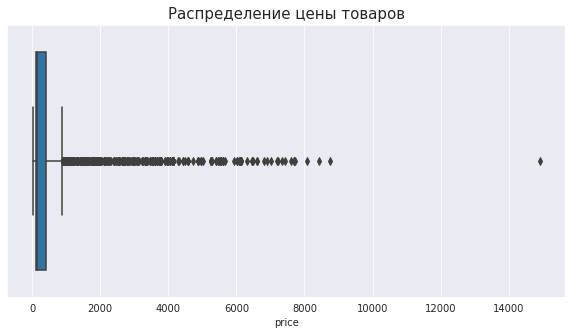

In [14]:
# посмотрим на распределение значений

plt.figure(figsize=(10,5))

sns.boxplot(data=data, x='price')

plt.title('Распределение цены товаров')
plt.show()

Для уменьшения количества выбросов снова применим фильтрацию по 99%:

In [15]:
# удаляем значения, превышающие 99%

data = (
    data[
        data['price'] <= 
        np.percentile(data['price'], 99)
    ]
)

# снова смотрим на статистику

data['price'].describe()

count   6,602.00
mean      409.23
std       657.67
min         9.00
25%       104.00
50%       135.00
75%       375.00
max     4,274.00
Name: price, dtype: float64

В данных остаётся множество выбросов, но это скорее всего обусловлено нерепрезентативностью выборки, потому фильтрация по порогам значений нормального распределения в данном случае будет некорректна. 

Добавим в датасет столбец с общей стоимостью товара в рамках одного заказа, умножив количество единиц на цену:

In [16]:
data['revenue'] = (data['items_sold'] * data['price']).astype('int16')    

Несмотря на то, что большая часть товаров представлена в заказах в единственном экземпляре, этот столбец может понадобится для корректного расчёта полной стоимости заказов.

In [17]:
# изменим тип данных и перейдём дальше

data['price'] = data['price'].astype('int16')

### Проверка дубликатов

Теперь, когда все столбца таблицы рассмотрены, проверим наличие дубликатов:

In [18]:
# проверяем явные дубликаты

print(f'Количество полностью задублированных строк в таблице - {len(data[data.duplicated()])}.')

Количество полностью задублированных строк в таблице - 0.


In [19]:
# проверим дубликаты по всем столбцам, кроме даты

cols = data.columns.to_list()[1:]

data[data[cols].duplicated()]

,date,customer_id,order_id,product,items_sold,price,weekday,revenue
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299,будни,3299
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299,будни,3299
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299,будни,3299
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299,будни,3299
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,эвкалипт гунни d-17 см h-60 см,1,1409,будни,1409
...,...,...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087,будни,1087
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,мирт d-9 см h-15 см,1,134,будни,134
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397,будни,397
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397,будни,397


- Если не рассмотривать столбец с датой заказа - данные содержат 1,853 задублированные строки. Скорее всего это обусловлено тем, что у заказов меняется статуc (например, "заказ принят" или "оплачено"), и с каждым обновлением данные снова попадают в историю транзакции. В целях анализа ассортимента товаров эти данные не нужны, потому все задублированные строки будут удалены:

In [20]:
# убираем задублированные заказы

data = data[~data[cols].duplicated()]

Теперь убедимся, что на каждый заказ приходится один уникальный пользователь:

In [21]:
# сгруппирем данные по заказам
# на каждый заказ должен быть один уникальный пользователь

orders = (
    data
    .groupby('order_id')
    .agg(dict(customer_id='nunique'))
)

# создадим список аномальных заказов

abnormal_orders = (
    orders[orders['customer_id'] > 1]
    .index
    .to_list()
)

# фильтруем данные по полученному списку

data.query('order_id in @abnormal_orders')

,date,customer_id,order_id,product,items_sold,price,weekday,revenue
512,2018-10-28 22:00:00,0b5ce2c7-acef-4a9a-b821-61a44ed05557,68785,"сиденье в ванну раздвижное, белый, св5, ника",1,374,выходные,374
538,2018-10-30 21:00:00,c1dd5c0e-51db-4a5d-91a3-5374cb20043d,68785,"сиденье в ванну раздвижное, белый, св5, ника",1,374,будни,374
1154,2018-12-10 12:00:00,2f955596-4b13-432e-93f3-6433395aafe6,69283,сушилка для белья на батарею ника сб6-65 двухъ...,1,164,будни,164
1160,2018-12-10 16:00:00,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,сушилка для белья на батарею ника сб6-65 двухъ...,1,164,будни,164
1177,2018-12-11 21:00:00,954172a5-634c-4a50-941d-9db6d15a7377,69310,"муляж груша желтый 9,5 см полиуретан",7,59,будни,413
...,...,...,...,...,...,...,...,...
6447,2019-09-28 10:00:00,a3d7fb5c-d3fb-40d6-b060-47a7061ca442,72790,сушилка для белья потолочно-настенная gimi lif...,1,1424,выходные,1424
6474,2019-09-30 09:00:00,07b63f16-aa4a-4acc-a7a5-af941fd4b0a9,72790,сушилка для белья потолочно-настенная gimi lif...,1,1424,будни,1424
6576,2019-10-10 22:00:00,31a39955-8a93-42f3-8839-04a9693632a7,72778,шеффлера голд капелла d-12 см h-25 см,1,149,будни,149
6601,2019-10-13 15:00:00,b1dbc7c4-3c84-40a7-80c9-46e2f79d24ad,72950,кастрюля эмалированная стэма с-1624 12 л цилин...,1,974,выходные,974


В получившейся таблице большая часть заказов является дубликатами, но помимо даты также отличается уникальным идентификатором пользователя - скорее всего это обусловлено технической ошибкой. Во избежание негативного влияния аномалий на результаты исследования эти заказы будут удалены из датасета:

In [22]:
data = (
    data
    .query('order_id not in @abnormal_orders')
    .reset_index(drop=True)
)

### Категоризация товаров

Ещё одна серьёзная задача - определение категории товара. Для этого попробуем воспользоваться внешними источниками.

In [23]:
# посмотрим на уникальные сочетания первых двух слов из названия продуктов

(
    data['product']
    .progress_apply(name_cut)
    .value_counts()
)

  0%|          | 0/4908 [00:00<?, ?it/s]

пеларгония зональная     386
сушилка для              270
пеларгония розебудная    248
рассада зелени           229
томата (помидор)         146
                        ... 
штангенциркуль 150         1
мята d-9                   1
тюльпан louvre             1
корзина на                 1
сверло по                  1
Name: product, Length: 903, dtype: int64

Среди продуктов интернет-магазина явной популярностью пользуются различные виды растений - используем данные сайта [**Растениевод**](https://rastenievod.com) для категоризации таких товаров. Используя парсинг представленного на сайте каталога домашних и садовых растений мы сможем сформировать списки, которые будут использованы как аргумент функции категоризации. Для автоматизации процесса категоризации напишем несколько функций:

In [24]:
# функция для удаления дубликатов из списков

def drop_d(l):
    l = list(dict.fromkeys(l))
    return l

In [25]:
# напишем функцию для лемматизации названий продуктов
# аргументом функции будет текст, который будет
# разбит на элементы, лемматезирован и сохранён в список

m = Mystem()
noise = stopwords.words('russian')

def itemize(names):
    
    items = m.lemmatize(names)
    items_list = []
    
    for i in range(len(items)):
        if re.search(r'[А-я]+', items[i]) != None:
            if items[i] not in noise:
                items_list.append(items[i])
    return drop_d(items_list)

try:
    print(itemize(data['product'][1]))
except:
    print('Не получилось')

['комнатный', 'растение', 'горшок', 'кофе', 'арабика']


In [26]:
# пишем функцию для парсинга сайта, результат сохраняем в списки

base_url = 'https://rastenievod.com/category/'
noise = stopwords.words('russian')


def get_plants(category, end_val): 

    '''На сайте три категории, внутри каждой от 10 до 20 страниц
       Ссылки однотипные, потому можно использовать метод перебора'''
    plants = []
    
    for i in trange (1, end_val): # диапазон = количество веб-страниц
        req = requests.get(base_url + category + '/page' + str(i))
        soup = BeautifulSoup(req.text, 'lxml')
        
        # ищем названия в загаловках
        for name in soup.find_all('h2', attrs={'class':'entry-title'}): 
            plants.append(
                name
                .text
                .lower()
                .split()
            )
            
    # в результате получился список списков
    # разделим его на элементы и удалим дубликаты
    
    plants_cleaned = []

    for sublists in plants:
        for items in sublists:
            if re.search(r'[А-яA-z]{2,}', items) != None:
                if items not in noise:
                    plants_cleaned.append(items)
    
    # избавимся от лишних символов
    
    for i in range(len(plants_cleaned)):
        plants_cleaned[i] = (
            plants_cleaned[i]
            .replace('(','')
            .replace(')','')
        )
    plants_cleaned.sort()
    
    # результат функции -
    # отсортированный список лемматизированных уникальных значений
    
    result = itemize(', '.join(plants_cleaned))
    
    return drop_d(result)

In [27]:
# попробуем получить список домашних растений 

houseplants = get_plants('komnatnye-rasteniya', 21)

houseplants[:10]

  0%|          | 0/20 [00:00<?, ?it/s]

['абелий',
 'абутилон',
 'авокадо',
 'агава',
 'аганизия',
 'агапантус',
 'аглаоморф',
 'аглаонема',
 'адениум',
 'адиантум']

Получилось! Используем функцию для получения списков ещё для двух категорий, после чего попробуем категоризовать товары из датасета:

In [28]:
# список садовых цветов

garden_flowers = get_plants('cvety-v-sadu', 11)

  0%|          | 0/10 [00:00<?, ?it/s]

In [29]:
# список других садовых растений (деревья, овощи и пр.)

garden_other = get_plants('sad-i-ogorod', 13)

  0%|          | 0/12 [00:00<?, ?it/s]

In [30]:
# пишем функцию для проверки вхождения названия товаров в списки

x_list = houseplants
x_name = 'домашние растения'

y_list = garden_flowers + garden_other
y_name = 'садоводство'

def get_category(product):

    '''так как в названии продукта будет проверяться каждое слово,
       введём бальную систему - создадим счётчик соответствия категории,
       за каждое вхождение в список присваиваем балл,
       чем больше баллов - тем более вероятно вхождение в категорию
       если количество баллов равно - присваиваем категорию второго списка'''
   
    x_score = 0
    y_score = 0

    for item in itemize(product):
        if item in x_list:
            x_score += 1
        elif item in y_list:
            y_score += 1            
    if x_score > y_score:  
        return x_name
    elif y_score > x_score:
        return y_name
    elif (y_score == x_score) and x_score != 0:
        return y_name
    else:
        return 'TBD'

In [31]:
# создаём столбец с результатом работы функции

data['category'] = (
    data['product']
    .progress_apply(get_category)
    .astype('string')
)

  0%|          | 0/4908 [00:00<?, ?it/s]

In [32]:
# посмотрим сколько товаров удалось категоризовать

data['category'].value_counts()

садоводство          2268
TBD                  1681
домашние растения     959
Name: category, dtype: Int64

В результате удалось в автоматизированном режиме определить категорию больше половины товаров. Посмотрим на остальные продукты и постараемся отнести к какой-либо группе:

In [33]:
# смотрим уникальные значения неопределённой категории товаров

(
    data
    .query('category == "TBD"')['product']
    .progress_apply(name_cut)
    .value_counts()
)

  0%|          | 0/1681 [00:00<?, ?it/s]

сушилка для          243
гладильная доска     116
чехол для             76
сумка-тележка 2-х     70
таз пластмассовый     62
                    ... 
сверло по              1
обувница-3 квадро      1
скатерть meiwa         1
щётка для              1
ёрш для                1
Name: product, Length: 428, dtype: int64

В данных осталось 428 уникальных товарных позиций без категории - для их обработки используем прайс-листы каталога товаров хозяйственного магазина [**Дома просто**](https://doma-prosto.ru/):

In [34]:
# скачиваем прайс-лист товаров для дома

household = pd.read_excel('https://doma-prosto.ru/eprices/download/1/')

# выводим первые 10 строк

household.head(10)

,Unnamed: 0,Прайс-лист,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,https://doma-prosto.ru/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Актуальность прайса на: 2022-10-05 20:18:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Для ДОМА,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,№,Картика,URL картинки,Артикул,Наименование,Описание,URL,Наличие,Цена (руб.),Полное описание
6,1,NaN,https://doma-prosto.ru/wa-data/public/shop/pro...,NaN,Варежка для мытья посуды и влажной уборки (1 шт.),NaN,https://doma-prosto.ru/product/varezhka-dlya-m...,Есть,95,\n\nХорошая хозяйка знает: уборка в доме должн...
7,2,NaN,https://doma-prosto.ru/wa-data/public/shop/pro...,NaN,"Мягкая салфетка из микрофибры, 25*23 см",NaN,https://doma-prosto.ru/product/myagkaya-salfet...,Есть,69,Салфетка микрофибра - универсальный и весьма п...
8,3,NaN,https://doma-prosto.ru/wa-data/public/shop/pro...,NaN,"Мягкая салфетка из микрофибры, 30*40 см",NaN,https://doma-prosto.ru/product/myagkaya-salfet...,Есть,126,Салфетка микрофибра - универсальный и весьма п...
9,4,NaN,https://doma-prosto.ru/wa-data/public/shop/pro...,NaN,Многофункциональный отрезной коврик в ящики ро...,NaN,https://doma-prosto.ru/product/mnogofunktsiona...,Есть,155,\n\nТекстиль для кухни - это беспроигрышный и ...


Из всей таблицы нам необходимы лишь наименования товара (пятый столбец) - из них можно будет сформировать список, по которому можно будет определять категорию продуктов из основного датасета. Посмотрим на таблицу второго сайта:

Напишем функцию для обработки прайс-листа, которую можно будет применять и к другим данным этого сайта:

In [35]:
def transform_excel(link, header=6, column='Наименование'):
    
    '''Функция преобразует столбец с наименованиями 
       товаров файла формата xlsx в список лемметизированных 
       уникальных значений'''
    
    table = (
        pd.read_excel(
            link,
            header=header)[column]    
    )
    result = list(table.str.lower())
    
    
    # избавимся от лишних символов
    
    for i in range(len(result)):
        result[i] = (
            result[i]
            .replace('(','')
            .replace(')','')
        )
    
    # результат функции -
    # отсортированный список лемматизированных уникальных значений
    
    result = itemize(', '.join(result))
    result_filtered = []
    
    for items in result:
        if re.search(r'[А-я]{3,}', items) != None:
            if items not in noise:
                 result_filtered.append(items)
    
    return drop_d(result_filtered)
    

In [36]:
# получаем списки

household = transform_excel('https://doma-prosto.ru/eprices/download/1/')
kitchen = transform_excel('https://doma-prosto.ru/eprices/download/20/')

Так как на сайте товары для кухни в основном представлены аксессуарами, дополним список `kitchen` каталогом посуды с сайта [**Posuda Super**](http://posuda-super.ru/):

In [37]:
tableware_url = 'http://posuda-super.ru/prajs-list.html'

req = requests.get(tableware_url)
soup = BeautifulSoup(req.text, 'lxml')

In [38]:
# парсим данные

tableware = (
    soup
    .find('table', 
          attrs={'class':'price-list'})
    .text
    .lower()
    .split()
)

# очищаем и сохраняем в список

tableware = itemize(', '.join(tableware))
tableware_filtered = []
    
for items in tableware:
    if re.search(r'[А-я]{3,}', items) != None:
        if items not in noise:
            tableware_filtered.append(items)
    
tableware = (drop_d(tableware_filtered))

In [39]:
# запускаем функцию категоризации
# результат сохраняем в отдельном столбце

x_list = household
x_name = 'товары для дома'

y_list = kitchen + tableware
y_name = 'товары для кухни'

data['category_1'] = (
    data['product']
    .progress_apply(get_category)
)

# объединяем категории

for i in range(len(data)):
    if data['category'][i] == 'TBD':
        data['category'][i] = data['category_1'][i]
    else: continue

data.drop('category_1', axis=1, inplace=True)


# смотрим на результат

data['category'].value_counts()

  0%|          | 0/4908 [00:00<?, ?it/s]

садоводство          2268
домашние растения     959
товары для дома       926
товары для кухни      597
TBD                   158
Name: category, dtype: Int64

In [40]:
# смотрим уникальные значения неопределённой категории товаров

(
    data
    .query('category == "TBD"')['product']
    .progress_apply(name_cut)
    .value_counts()
)

  0%|          | 0/158 [00:00<?, ?it/s]

тележка багажная               9
лестница-стремянка dogrular    8
корыто оцинкованное            7
стремянка бытовая              5
муляж желудь                   4
                              ..
веревка полипропиленовая       1
шпагат полипропиленовый        1
сетка для                      1
артемизия (полынь              1
чистящий крем                  1
Name: product, Length: 87, dtype: int64

В данных осталось 87 некатегоризированных товаров. Так как это около 2% от датасета, целесообразнее будет удалить эти данные, чем категоризовать их вручную:

In [41]:
data = data.query('category != "TBD"')

### Итоги

При обработке данных были отмечены следующие моменты:

- Данные содержат информацию о заказах, совершённых с 10.01.2018 по 31.10.2019



- Рассматриваемые 6,737 транзакций совершили 2,451 уникальных пользователей, причём 888 из них совершил один и тот же пользователь, что возможно характеризует его как оптового покупателя.



- В данных содержится информация об 2,784 уникальных заказах, в самом крупном из которых - 888 товаров, что явно указывает на оптового покупателя, выделенного при рассмотрении предыдущего столбца.



- В данных представлены 2,341 уникальный товар, самым популярным из которых является рассада кабачка определённого сорта. 



- При группировке по первым двум словам из названия получается 927 уникальных товара, 462 из которых являются вариантом рассады кабачка. 



- Большая часть товаров присутствует в заказах в единичном экземпляре. Максимальное значение столбца в 1,000 штук может быть как оптовой закупкой, так и выбросом, вызванным технической аномалией.



- Средняя цена товара превышает значение 75% процентиля, что указывает на наличие аномальных выбросов.



- Если не рассмотривать столбец с датой заказа - данные содержат 1,853 задублированные строки. Скорее всего это обусловлено тем, что у заказов меняется статут (например, "заказ принят" или "оплачено"), и с каждым обновлением данные снова попадают в историю транзакции. В целях анализа ассортимента товаров эти данные не нужны, потому все задублированные строки будут удалены:

В самом начале сырой датасет был сохранён в переменную `original` - попробуем сравнить его с обработанными данными:

In [42]:
# выводим общую информацию

original.info()
print('')
data.info()

# посчитаем разницу в количестве строк и используемых ресурсов памяти

size_diff = (
    round(
        (len(data)/len(original)-1)*-100, 2)
)

memory_diff = round(
    (data.memory_usage().sum()
     /original.memory_usage().sum()-1)*-100, 2)

print('')
print(f'''В ходе предобработки данных было удалено {size_diff}% датасета, 
при этом удалось сократить использование памяти на {memory_diff}%.''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4750 entries, 0 to 4907
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4750 non-null   datetime64[ns]
 1   customer_id  4750 non-null   string        
 2   order_id     4750 non-null   string        
 3   product      4750 non-null   string        
 4   items_sold   4750 non-null   int16         
 5   price        4750 non-null   int16     

Обработанный датасет содержит 9 столбцов и 4,750 строк. За счёт изменения типов данных удалось сократить использование памяти, несмотря на добавление трёх дополнительных столбцов. Большая часть данных была удалена при обработке дубликатов, предположительно вызванных дублированием данных о заказах при изменении статуса. Вручную было удаленно не более 2% данных, потому распределение таких параметров, как цена и количество уникальных пользователей, осталось без изменений.

Товары были категоризированы на четыре группы: `товары для дома`, `домашние растения`, `садоводство` и `товары для кухни`, также был добавлен столбцы `будни/выходные дни` и `выручка`.

<a id='3'></a>
## Исследовательский анализ данных

Исследование будет проведено в три этапа:
1. [**Анализ заказов**](#3.1) - данные будут сгруппированы по идентификаторам, после чего будет визуализировано распределение значений
2. [**Анализ товаров**](#3.2) - будет проведён аналогичный анализ данных, но уже сгруппированных по уникальным товарам
3. [**ABC анализ**](#3.3) - будет проведён ABC-анализ товаров с учётом распределения всех основных параметров каждого товара.

<a id='3.1'></a>
### Анализ заказов

Приступим к анализу заказов - сгруппируем данные по уникальным идентификаторам и  изучим данные:

In [43]:
# сохраним копию датасета для eda

eda = data.copy()

# от даты оставим только год и месяц

eda['month'] = (
    pd.to_datetime(eda['date'])
    .dt.to_period('M')
)

# группируем данные

orders = (
    eda
    .pivot_table(
        index=('month','order_id', 'category'),
        values=('items_sold', 'revenue'),
        aggfunc='sum'
    )
    .reset_index()
)

# выводим общую информацию

orders.info()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   month       2770 non-null   period[M]
 1   order_id    2770 non-null   object   
 2   category    2770 non-null   object   
 3   items_sold  2770 non-null   int16    
 4   revenue     2770 non-null   int16    
dtypes: int16(2), object(2), period[M](1)
memory usage: 75.9+ KB


,items_sold,revenue
count,"2,770.00","2,770.00"
mean,3.12,946.33
std,5.12,"1,219.65"
min,1.00,10.00
25%,1.00,225.00
50%,1.00,598.00
75%,3.00,"1,139.00"
max,56.00,"21,576.00"


- В среднем заказе выручка составляет около 1,000 и количество товаров составляет около 3 шт. При этом больше половины заказов не достигают средних значений, что говорит о значительном смещении распределения значений вправо, что характеризует наличие выбросов. 

Начнём с поиска фактора сезонности - изучим распределение двух основных параметров `revenue` и `items_sold` по времени:

In [44]:
# группируем данные

orders_by_month = (
    orders
    .groupby(['month', 'category'])
    .agg('sum')
    .reset_index()
)

# основные параметры

params = ['items_sold', 'revenue']

# функция для визуализации

def time_dist(
    param, color='skyblue', 
    df=(
        orders_by_month
        .groupby('month')
        .agg('sum')
        .reset_index()
    ), hue=None):
    
    plot = sns.barplot(
        data=df, y=param, 
        x='month', hue=hue, 
        color=color)
    
    return plot
    

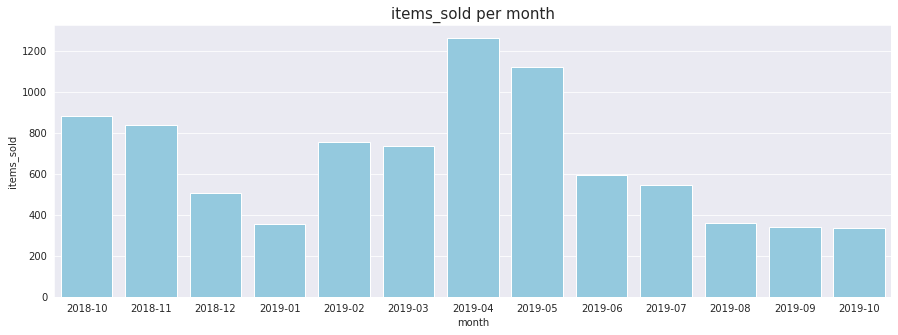

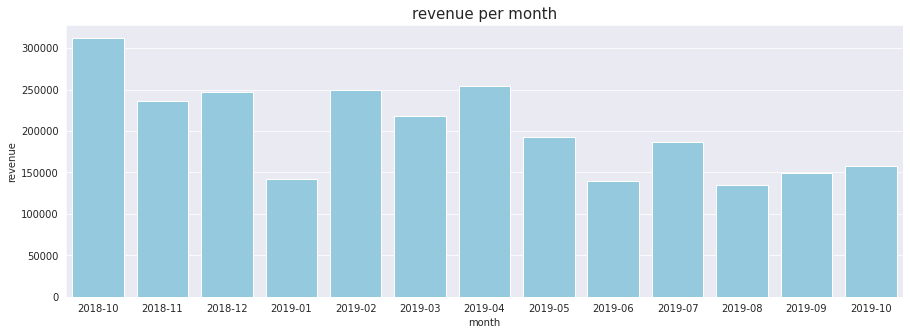

In [45]:
# визуализируем данные о выручке и количестве проданных товаров

for val in params:
    
    plt.figure(figsize=(15,5))

    time_dist(val)

    plt.title(val + ' per month')

У количества проданных товаров и объёма продаж есть явные отличия по месяцам, но выявить какую-либо чёткую закономерность представляется затруднительным. Можно отметить следующие:

- Пик по общей выручке приходится на октябрь 2018, а по количеству проданных товаров - на апрель и май.


- При учёте обоих параметров самым слабым месяцем является январь. При этом октябрь 2019 показывает намного более низкие значения, чем показатели этого месяца в прошлом году.

Попробуем визуализировать эти данные ещё раз, но уже в разрезе категорий:

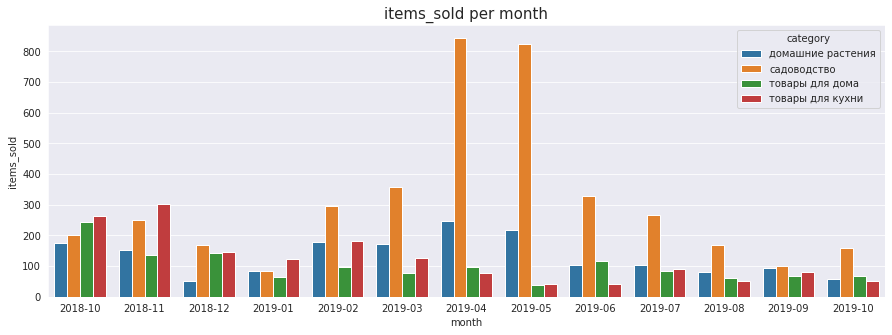

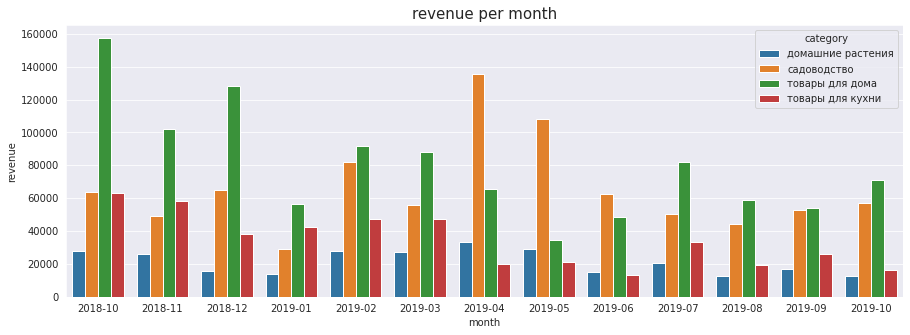

In [46]:
# визуализируем данные в разрезе категорий

for val in params:
    
    plt.figure(figsize=(15,5))

    time_dist(val, None, orders_by_month, 'category')
    plt.title(val + ' per month')
    plt.show()


При категоризации товаров прослеживается явная подверженность сезонности для разных групп:

- Категория **Домашние растения** имеет самое стабильное распределение по выручке, несмотря на перепады по количеству проданного товара - на протяжении всего года общая выручка держится на уровне 20,000. По обоим рассматриваемым параметрам эта категория никогда не занимает лидирующей позиции. Пик спроса приходится на апрель-май.


- Товары категории **Садоводство** занимают лидерство по спросу и выручке на протяжении весенних месяцев, после чего происходит спад. Категория приносит стабильно выскокий доход на протяжении всего года, но по количеству проданных товаров апрель и май показывают аномально высокий спрос. Таким образом эту категорию можно охарактеризовать как наиболее подверженную фактору сезонности.


- **Товары для дома** лидируют по выручке во все месяца, кроме апреля и мая, где для **Садоводства** начинается сезон. При этом же показатель количества проданных товаров является одним из самых низких - это явно указывает на высокую стоимость товаров


- **Товары для кухни** имеют стабильный спрос осенне-зимние месяцы, после чего испытывают спад на протяжении следующего полугода, что отражается на обоих параметрах.

<a id='3.2'></a>
### Анализ товаров
Теперь проанализируем те же параметры в разрезе уникальных товаров:

In [47]:
# сгруппируем данные по уникальным товарам

products = (
    eda
    .pivot_table(
        index=('category', 'product'),
        values=('items_sold', 'revenue'),
        aggfunc='sum')
    .reset_index()
    .drop_duplicates()
)

# выводим общую информацию

products.info()
products.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2146 entries, 0 to 2145
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    2146 non-null   object 
 1   product     2146 non-null   object 
 2   items_sold  2146 non-null   int16  
 3   revenue     2146 non-null   float64
dtypes: float64(1), int16(1), object(2)
memory usage: 71.3+ KB


,items_sold,revenue
count,"2,146.00","2,146.00"
mean,4.03,"1,221.49"
std,7.06,"2,291.78"
min,1.00,9.00
25%,1.00,186.25
50%,2.00,486.50
75%,4.00,"1,234.00"
max,96.00,"51,454.00"


- Всего 2,146  уникальных товаров. В среднем каждый товар за рассматриваемый период продаётся в количестве 4 шт. и приносит около 1,200 выручки.

Посмотрим на данные в разрезе категорий:

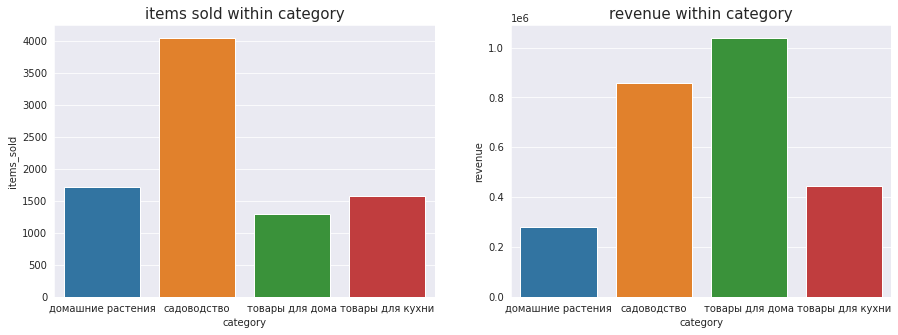

In [48]:
# общее количество проданных товаров и выручка по категориям

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

grouped = (
    products
    .groupby('category')
    .agg('sum')
    .reset_index()
)

sns.barplot(data=grouped, x='category', y='items_sold', ax=ax1)
sns.barplot(data=grouped, x='category', y='revenue', ax=ax2)

ax1.set_title('items sold within category')
ax2.set_title('revenue within category')

plt.show()

- Категория **Садоводство** лидирует по количеству проданных товаров с большим отрывом - это указывает на низкую стоимость товара при большом спросе.

- С категорией **Товары для дома** ситуация противоположная - самая высокая общая выручка и самое низкое количество проданного товара, что явно указывает на сравнительно высокую стоимость продуктов этой категории.

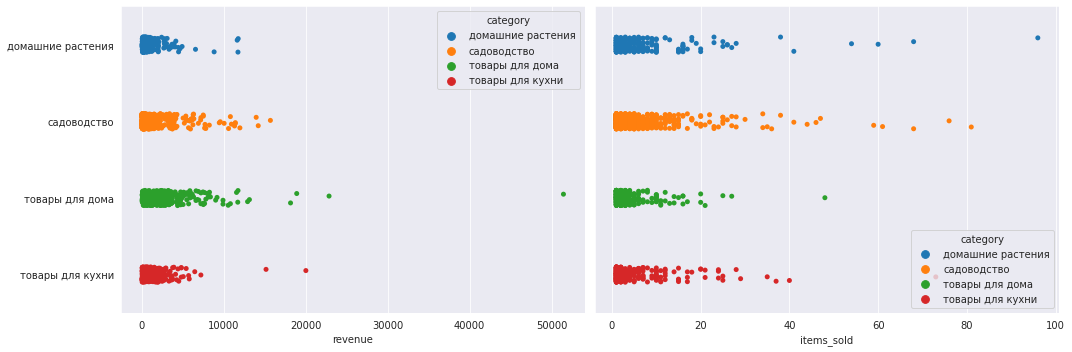

In [49]:
# посмотрим на категории в разрезе товаров

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.stripplot(data=products, x='revenue', y='category', ax=ax1, hue='category')
sns.stripplot(data=products, x='items_sold', y='category', ax=ax2, hue='category')
    
# ax1.set_title('revenue per product')
# ax2.set_title('items sold per product')

for axes in [ax1, ax2]:
    axes.set_ylabel('')
    
plt.tight_layout()


- Выводы из анализа куммулятивных значений подтверждаются - категория **Товары для дома** действительна характерна наличием особенно прибыльных товаров, ровно как и категория **Садоводство** - наличием особенно хорошо продающихся продуктов.

Посмотрим на распределение параметров:

In [50]:
# напишем функцию для визуализации распределения
# в разрезе категорий и дней недели

def kde_dist(par):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

    sns.kdeplot(data=products, x=par, ax=ax1, fill=True)
    sns.kdeplot(data=products, x=par, hue='category', ax=ax2)

    
    plt.suptitle(par + ' distribution', fontsize=18)
    ax1.set_title('general')
    ax2.set_title('within a category')

    
    plt.tight_layout()
    plt.show()

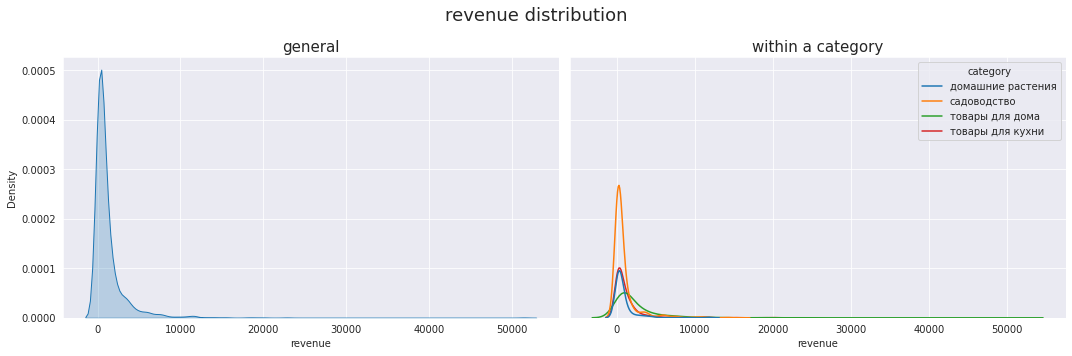

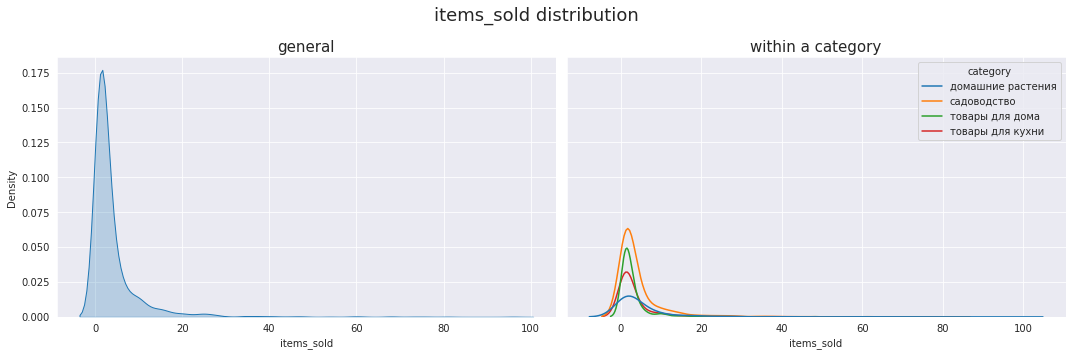

In [51]:
# визуализируем распределение

params = ['revenue', 'items_sold']

for val in params:
    kde_dist(val)

- Все данные имеют вид нормального распределения с наличием выбросов в большую сторону. По большей части графики в своих разрезах отличаются лишь размером параметров, тогда как по форме распределения они схожи.

Для корректного анализа в дальнейшем ограничим данные, избавившись от больших выбросов. Поставим лимит на выручку - 5,000, а на количество проданных товаров - 10:

In [52]:
# удалим выбросы и перегруппируем данные

products = products.query('revenue <= 5000 & items_sold <= 10')

# обновим датафрейм

eda = eda[eda['product'].isin(products['product'])]

<a id='3.3'></a>
### ABC анализ
Распределение значений на прошлом графике показывает, что довольно малая часть товаров приносит сравнительно большую прибыль и объем продаж. Попробуем провести [**ABC анализ**](https://en.wikipedia.org/wiki/ABC_analysis) выручки для категоризации товаров с точки зрения их вклада в экономику интернет-магазина:

In [53]:
# добоваим количество заказов

def product_group(df):
    
    result = (
        df
        .groupby(['category','product'])
        .agg({'order_id':'nunique'})
        .sort_values('order_id', ascending=False)
        .rename(columns={'order_id':'orders_count'})
)
    return result

products_abc = (
    products
    .merge(product_group(eda), how='outer', 
           on='product')
)

# смотрим на результат

products_abc

,category,product,items_sold,revenue,orders_count
0,домашние растения,адиантум лиза d-12 см,1,412.00,1
1,домашние растения,азалия индика биколор d-12 см,1,307.00,1
2,домашние растения,азалия индика биколор d-12 см h-20,1,344.00,1
3,домашние растения,азалия индика розовая d-12 см h-20,1,344.00,1
4,домашние растения,азалия индика фиолетовая d-10 см h-20,1,209.00,1
...,...,...,...,...,...
1896,товары для кухни,этажерка для обуви ника этп3/з с ящиком золотой,2,"2,624.00",2
1897,товары для кухни,этажерка цветочная пластиковая ливия 5 кашпо м...,1,599.00,1
1898,товары для кухни,ящик почтовый металлический с ушками для навес...,1,172.00,1
1899,товары для кухни,ёрш для бутылки из натурального волокна и мета...,10,"1,420.00",1


В полученной таблице мы видим общее количество проданных товаров, округлённую выручку и количество чеков для каждого продукта. Проведём ABC анализ с учётом каждого параметра, используя для оптимизации процесса алгоритм кластеризации. 

Так как одна из основных целей исследования - выделение основного ассортимента товаров, все параметры необходимо учитывать. Поэтому ABC анализ будет проведён на основе синтетического критерия, полученного из всех трёх параметров с применением коэффициента "важности":

In [54]:
# преобразуем данные - вместо нормализации значений 
# переведём их в формат '% от итога'

def get_share(col):
    new_col = col/col.sum()*100
    return new_col

for val in list(products_abc.columns[2:]):
    products_abc[val+'%'] = get_share(products_abc[val])

Теперь расчитаем синтетический критерий для ABC анализа. Cложим все три параметра, задав каждому свой "вес" - выделим выручку как основной параметр (коэффициент **0.6**), а показателям количества проданного товара и заказов  присвоим по **0.2**. После этого используем алгоритм кластеризации для проведения анализа:

In [55]:
# считаем синтетический критерий

products_abc['abc_coeff'] = (
    products_abc['orders_count%']*0.2
    + products_abc['items_sold%']*0.2
    + products_abc['revenue%']*0.6
)

# проводим ABC анализ

km = KMeans(n_clusters=3, random_state=5)
x = km.fit_transform(products_abc.set_index('product')['abc_coeff'].to_frame())

products_abc['cluster'] = km.fit_predict(x)

In [56]:
# выводим результаты ABC, предварительно сгруппировав данные

agg_dict = {
    'product':'count',
    'items_sold%':'sum',
    'revenue%':'sum',
    'orders_count%':'sum'
}

abc_summury = (
    products_abc
    .groupby('cluster')
    .agg(agg_dict)
    .rename(columns={'product':'products%'})
)

abc_summury['products%'] = get_share(abc_summury['products%'])

cluster = abc_summury.index
products = round(abc_summury['products%'], 2)
items = round(abc_summury['items_sold%'], 2)
revenue = round(abc_summury['revenue%'], 2)
orders = round(abc_summury['orders_count%'], 2)

display(abc_summury)
print('')


for i in range(3):
    
    print(f'''Категория `{cluster[i]}` составляет {products[i]}% всех товаров, принося при этом {revenue[i]}% всей выручки.
Товары категории встречаются в {orders[i]}% заказов и составляют {items[i]}% от всех проданных товаров в магазине.''')
    print('')

,products%,items_sold%,revenue%,orders_count%
cluster,,,,
0,61.65,41.22,21.30,46.17
1,9.89,16.43,37.86,18.04
2,28.46,42.35,40.84,35.79



Категория `0` составляет 61.65% всех товаров, принося при этом 21.3% всей выручки.
Товары категории встречаются в 46.17% заказов и составляют 41.22% от всех проданных товаров в магазине.

Категория `1` составляет 9.89% всех товаров, принося при этом 37.86% всей выручки.
Товары категории встречаются в 18.04% заказов и составляют 16.43% от всех проданных товаров в магазине.

Категория `2` составляет 28.46% всех товаров, принося при этом 40.84% всей выручки.
Товары категории встречаются в 35.79% заказов и составляют 42.35% от всех проданных товаров в магазине.



С учётом распределения значений в полученной таблице группой **А** можно считать кластер 2, группой **B** будет являтся кластер 1, а группой **С** - кластер 0.

- Несмотря на свою немногочисленность, группа **A** является важным источником прибыли для магазина. Группа **B** также хорошо себя показывает, а вот многочисленный ассортимент группы **С** стоит пересмотреть - товары в ней не так популярны и приносят лишь 20% всей выручки. Именно из этой группы стоит выделять товары для возможных сокращений.

In [57]:
# присваиваем категории

abc_dict = {    
    0: 'C',
    1: 'B',
    2: 'A'
}

products_abc['abc'] = (
    products_abc['cluster']
    .apply(lambda x: abc_dict[x])
)


# добавим категорию ABC в основной датафрейм

eda = (
    eda
    .join(products_abc[['product', 'abc']]
          .set_index('product'), 
          on='product', how='left')
)

### Итоги

Исследовательский анализ был проведен в три этапа:

1. [**Анализ заказов**](#3.1) - данные были сгруппированы по идентификаторам, после чего было визуализировано распределение значений


- В среднем заказе выручка составляет около 1,000 и количество товаров составляет около 3 шт. При этом больше половины заказов не достигают средних значений, что говорит о значительном смещении распределения значений вправо, что характеризует наличие выбросов. 

У общего количества проданных товаров и объёма продаж есть явные отличия по месяцам, но выявить какую-либо чёткую закономерность представляется затруднительным. Можно отметить следующие:

- Пик по общей выручке приходится на октябрь 2018, а по количеству проданных товаров - на апрель и май.


- При учёте обоих параметров самым слабым месяцем является январь. При этом октябрь 2019 показывает намного более низкие значения, чем показатели этого месяца в прошлом году.


При категоризации товаров прослеживается явная подверженность сезонности для разных групп:

- Категория **Домашние растения** имеет самое стабильное распределение по выручке, несмотря на перепады по количеству проданного товара - на протяжении всего года общая выручка держится на уровне 20,000. По обоим рассматриваемым параметрам эта категория никогда не занимает лидирующей позиции. Пик спроса приходится на апрель-май.


- Товары категории **Садоводство** занимают лидерство по спросу и выручке на протяжении весенних месяцев, после чего происходит спад. Категория приносит стабильно выскокий доход на протяжении всего года, но по количеству проданных товаров апрель и май показывают аномально высокий спрос. Таким образом эту категорию можно охарактеризовать как наиболее подверженную фактору сезонности.


- **Товары для дома** лидируют по выручке во все месяца, кроме апреля и мая, где для **Садоводства** начинается сезон. При этом же показатель количества проданных товаров является одним из самых низких - это явно указывает на высокую стоимость товаров


- **Товары для кухни** имеют стабильный спрос осенне-зимние месяцы, после чего испытывают спад на протяжении следующего полугода, что отражается на обоих параметрах.

2. [**Анализ товаров**](#3.2) - был проведён аналогичный анализ данных, но уже сгруппированных по уникальным товарам

- Всего в данных 2,146  уникальных товаров. В среднем каждый товар за рассматриваемый период продаётся в количестве 4 шт. и приносит около 1,200 выручки.


- Категория **Садоводство** лидирует по количеству проданных товаров с большим отрывом - это указывает на низкую стоимость товара при большом спросе.


- С категорией **Товары для дома** ситуация противоположная - самая высокая общая выручка и самое низкое количество проданного товара, что явно указывает на сравнительно высокую стоимость продуктов этой категории.


- Все данные имеют вид нормального распределения с наличием выбросов в большую сторону. По большей части графики в своих разрезах отличаются лишь размером параметров, тогда как по форме распределения они схожи.

3. [**ABC анализ**](#3.3) - был проведён ABC-анализ товаров с учётом распределения всех основных параметров каждого товара.

Результаты:

Категория **`A`** составляет 9.89% всех товаров, принося при этом 37.86% всей выручки.
Товары категории встречаются в 18.04% заказов и составляют 16.43% от всех проданных товаров в магазине.

Категория **`B`** составляет 28.46% всех товаров, принося при этом 40.84% всей выручки.
Товары категории встречаются в 35.79% заказов и составляют 42.35% от всех проданных товаров в магазине.

Категория **`C`** составляет 61.65% всех товаров, принося при этом 21.3% всей выручки.
Товары категории встречаются в 46.17% заказов и составляют 41.22% от всех проданных товаров в магазине.


- Несмотря на свою немногочисленность, группа **A** является важным источником прибыли для магазина. Группа **B** также хорошо себя показывает, а вот многочисленный ассортимент группы **С** стоит пересмотреть - товары в ней не так популярны и приносят лишь пятую часть всей выручки. Именно из этой группы стоит выделять товары для возможных сокращений.

<a id='4'></a>
## Сегментация товарного ассортимента

Используем алгоритм из ABC анализа для разделения товаров на основной и дополнительный ассортимент, после чего повторим исследовательский анализ в разрезе полученных категорий:

<a id='4.1'></a>
### Выделение основного и дополнительного ассортимента

В качестве параметров для кластеризации будем использовать два значения - количество заказов, где товар покупается отдельно, и количество заказов, где помимо товара покупается что-то ещё:

In [58]:
# считаем количество заказов через группировку данных

def product_group(df):
    
    result = (
        df
        .groupby('product')
        .agg({'order_id':'nunique'})
        .sort_values('order_id', ascending=False)
        .fillna(0)
)
    return result

# показатель количества комбинированных чеков посчитаем с помощью дубликатов номеров заказов

df2 = eda[eda['order_id'].duplicated()]

products_orders = (
    product_group(eda)
    .merge(product_group(df2), how='outer', 
           left_index=True, 
           right_index=True)
    .rename(columns={
        'order_id_x':'order_count',
        'order_id_y':'compound_orders'}
           )
)

# заполняем пропуски, приводим к целым числам

products_orders.fillna(0, inplace=True)
products_orders['compound_orders'] = (
    products_orders['compound_orders']
    .astype('int16')
)

# считаем количество одиночных закупок

products_orders['sole_item_orders'] = (
    products_orders['order_count']-products_orders['compound_orders']
)

# смотрим на результат

products_orders

,order_count,compound_orders,sole_item_orders
product,,,
tepмокружка avex freeflow 700 мл зеленый avex0759,1,0,1
tepмокружка avex freeflow 700 мл сталь avex0776,1,0,1
tepмокружка avex recharge 500 мл голубой avex0681,2,0,2
агератум рассада однолетних цветов в кассете по 10 шт,1,1,0
адиантум лиза d-12 см,1,0,1
...,...,...,...
ёрш бутылочный с металлической ручкой малый y64 1807002,1,0,1
"ёрш для бутылки из натурального волокна и металла 23 см кремовый, burstenmann, 0473/0003",1,0,1
ёрш радиаторный без ручки 1807007,1,0,1


В полученной таблице на каждый уникальный товар мы видим общее количество заказов, а также количество комбинированных заказов и заказов, где товар является единственной покупкой. Используем последнее значение для алгоритма кластеризации: 

In [59]:
# считаем долю заказов с одним товаром

products_orders['sole_share'] = (
    products_orders['sole_item_orders']/
    products_orders['order_count']*100
)

# выделяем категории

par = products_orders['sole_share'].to_frame()

km = KMeans(n_clusters=2, random_state=0)
x = km.fit_transform(par) 

products_orders['cluster'] = km.fit_predict(x)

In [60]:
# считаем дополнительные столбцы, смотрим на результат

assortment = (
    products_orders
    .reset_index()
    .groupby('cluster')
    .agg({
        'product':'nunique',
        'order_count':'sum',
        'compound_orders':'sum',
        'sole_item_orders':'sum'}
    )
)

assortment['sole_share'] = (
    assortment['sole_item_orders']/
    assortment['order_count']*100
)

assortment['total_sole_share'] = (
    get_share(assortment['sole_item_orders'])
)

cluster = assortment.index
products = round(
    assortment['product']/
    assortment['product'].sum()*100, 2
)
sole = round(assortment['sole_share'], 2)
sole_1 = round(assortment['total_sole_share'], 2)

display(assortment)
print('')


for i in range(2):
    
    print(f'''Кластер `{cluster[i]}` составляет {products[i]}% всех товаров. 
В кластере {sole[i]}% заказов с единственным товаром. Это {sole_1[i]}% всех подобных заказов.''')
    print('')

,product,order_count,compound_orders,sole_item_orders,sole_share,total_sole_share
cluster,,,,,,
0,786,1389,1254,135,9.72,7.96
1,1115,1626,64,1562,96.06,92.04



Кластер `0` составляет 41.35% всех товаров. 
В кластере 9.72% заказов с единственным товаром. Это 7.96% всех подобных заказов.

Кластер `1` составляет 58.65% всех товаров. 
В кластере 96.06% заказов с единственным товаром. Это 92.04% всех подобных заказов.



- Кластер `1` можно смело выделить как основной ассортимент магазина - несмотря на значительно больший размер группы, товары этого кластера являются единственным поводом для заказа более чем в 96% случаев. Группу `0` же определим как дополнительный ассортимент, товары которой по большей части продаётся лишь в составе заказов с другими товарами.

Добавим категорию ассортимента в основной датафрейм:

In [61]:
# присваиваем категории

ass_dict = {    
    1: 'основной ассортимент',
    0: 'дополнительный ассортимент',
}

products_orders['assortment'] = (
    products_orders['cluster']
    .apply(lambda x: ass_dict[x])
)

# добавим категорию ассортимента в основной датафрейм

eda = (
    eda
    .join(products_orders['assortment']
          .to_frame(), 
          on='product', how='left')
)

<a id='4.2'></a>
### Анализ ассортимента

Изучим подробнее распределение категорий ассортимента, объеденив всю категоризацию в сводную таблицу:

In [62]:
# группируем данные

categories = (
    eda
    .groupby(['assortment', 'category', 'abc'])
    .agg({'product':'nunique', 
          'revenue':'sum',
          'items_sold':'sum'})
    .reset_index()
)

for val in list(categories.columns)[3:]:
    categories[val+'%'] = get_share(categories[val])

In [63]:
# вспомогательная функция для визуализации, помогающая делать срезы данных

def plot_query(query, par):
    result = round(categories.query(query)[par+'%'].sum())
    return result


# функция для визуализации параметров

def cat_info(par):
    
    # визуализируем данные

        sns.catplot(
            data=categories, 
            hue='category', 
            y=par, 
            col='abc', 
            x='assortment', 
            kind='bar')
        
        plt.suptitle(par + ' categories distribution', 
                     y=1.1, fontsize=18)  
        plt.show()
        
    # описываем данные
    
        A = plot_query('abc == "A"', par)
        B = plot_query('abc == "B"', par)
        C = plot_query('abc == "C"', par)
        main = plot_query('assortment == "основной ассортимент"', par)
        add = plot_query('assortment == "дополнительный ассортимент"', par)
        houseplants = plot_query('category == "домашние растения"', par)
        gardening = plot_query('category == "садоводство"', par)
        household = plot_query('category == "товары для дома"', par)
        kitchen = plot_query('category == "товары для кухни"', par)

    
        print(
            f'''
            total of {par} - {categories[par].sum()}
            
            main assortment - {main}%, additional assortment- {add}%
            houseplants - {houseplants}%, gardening - {gardening}%, household - {household}%, kitchen - {kitchen}%
            A - {A}%, B - {B}%, C - {C}%            

            ''')

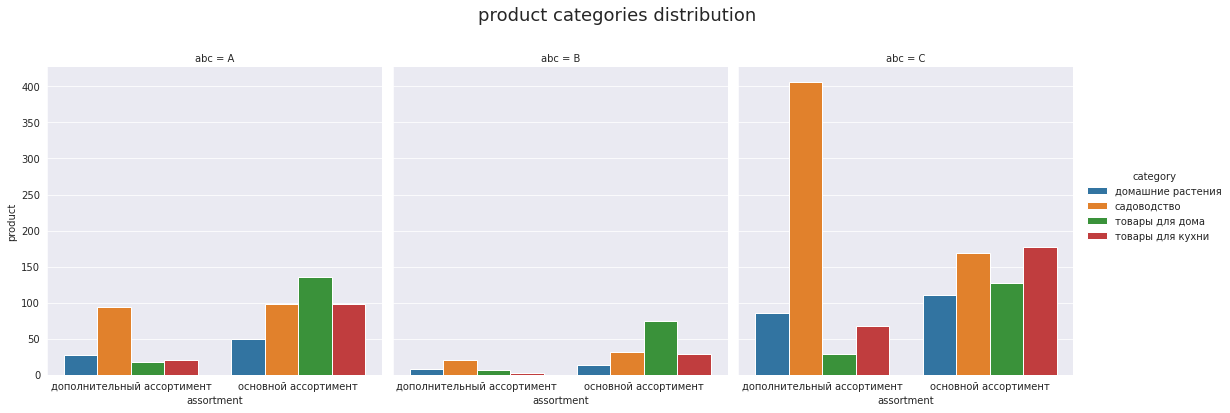


            total of product - 1901
            
            main assortment - 59%, additional assortment- 41%
            houseplants - 16%, gardening - 43%, household - 21%, kitchen - 21%
            A - 28%, B - 10%, C - 62%            

            


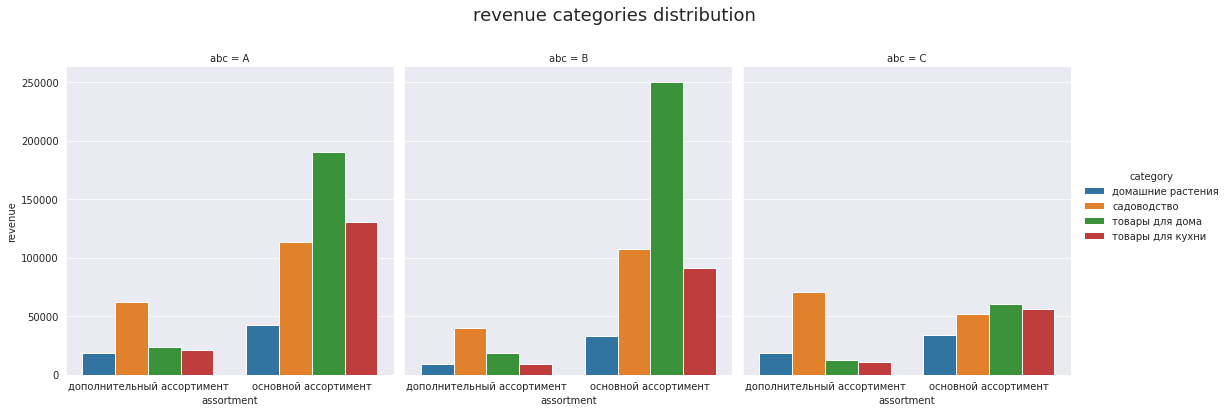


            total of revenue - 1478936.0
            
            main assortment - 79%, additional assortment- 21%
            houseplants - 11%, gardening - 30%, household - 38%, kitchen - 22%
            A - 41%, B - 38%, C - 21%            

            


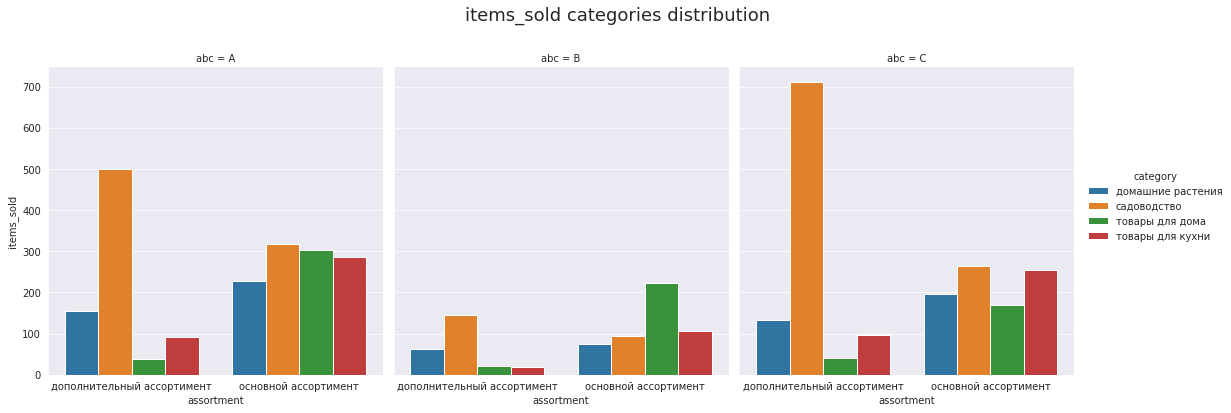


            total of items_sold - 4527
            
            main assortment - 56%, additional assortment- 44%
            houseplants - 19%, gardening - 45%, household - 18%, kitchen - 19%
            A - 42%, B - 16%, C - 41%            

            


In [64]:
# изучим распределение параметров по всем категориям.

for parameter in categories.columns[3:6]:

    cat_info(parameter)

- Самый лучший во всех отношениях сегмент товаров - **Товары для дома** группы `A` в основном ассортименте. Они являются самыми продаваемыми и самыми прибыльными, и при этом же самым многочисленным товаром в группе `A`. Эта категория также хорошо показывает себя в группе `B`, а вот товары для дома в группе `C` необходимо изучить для поиска отличий от остальных товаров.

- Категория **Садоводство** является крупнейшей категорией товаров, и большая их часть сосредоточена в сегменте `C` дополнительного ассортимента. Так как пренадлежность к этой категории означает, прежде всего, низкий показатель выручки, эти товары необходимо сократить для оптимизации издержек. В целом товары этой категории характерны реалезацией в качестве дополнительно ассортимента.

In [65]:
# обновим основной датафрейм и сохраним датасеты для дашборда

data = eda.drop(columns='month')

data.to_csv(os.getcwd() + '/assortment_data.csv')
data.groupby('order_id').agg('sum').to_csv(os.getcwd() + '/assortment_orders.csv')
categories.to_csv(os.getcwd() + '/assortment_data_categories.csv')

### Итоги

Используя алгоритм из ABC анализа для разделения товаров на основной и дополнительный ассортимент, товары были проанализированы в разрезе всех представленных категорий.

Результат кластеризации:

Кластер `0` составляет 41.35% всех товаров. 
В кластере 9.72% заказов с единственным товаром. Это 7.96% всех подобных заказов.

Кластер `1` составляет 58.65% всех товаров. 
В кластере 96.06% заказов с единственным товаром. Это 92.04% всех подобных заказов.

- Кластер 1 был выделен как основной ассортимент магазина - несмотря на значительно больший размер группы, товары этого кластера являются единственным поводом для заказа более чем в 96% случаев. Группа 0 же была определена как дополнительный ассортимент, товары которой по большей части продаётся лишь в составе заказов с другими товарами.


Ключевые выводы анализа категорий:

- Самый лучший во всех отношениях сегмент товаров - **Товары для дома** группы `A` в основном ассортименте. Они являются самыми продаваемыми и самыми прибыльными, и при этом же самым многочисленным товаром в группе `A`. Эта категория также хорошо показывает себя в группе `B`, а вот товары для дома в группе `C` необходимо изучить для поиска отличий от остальных товаров.


- Категория **Садоводство** является крупнейшей категорией товаров, и большая их часть сосредоточена в сегменте `C` дополнительного ассортимента. Так как пренадлежность к этой категории означает, прежде всего, низкий показатель выручки, эти товары необходимо сократить для оптимизации издержек. В целом товары этой категории характерны реалезацией в качестве дополнительно ассортимента.

<a id='5'></a>
## Проверка гипотез

На этапе декомпозиции задачи было выдвинуто две гипотезы:

- *Средняя выручка заказа без дополнительных товаров отличается от средней выручки заказов с дополнительными товарами*
- *Среднее количество товаров, проданных в будние дни, отличается от среднего количества проданных на выходных*

Так как при исследовательском анализе были выявлены выбросы в распределении данных, для проверки гипотез будем использовать непараметрический тест Манна-Уитни.

### Сравнение выручки заказов из разных категорий ассортимента

**H0** - cредняя выручка заказа без дополнительных товаров не отличается от средней выручки заказов с дополнительными товарами

**H1** - cредняя выручка заказа без дополнительных товаров имеет отличие от средней выручки заказов с дополнительными товарами

In [66]:
# cгруппируем данные - выделим заказы только с основными товарами 
# и те, где есть обе категории

data_h = (
    data
    .pivot_table(index=['order_id'], 
                 values='revenue', 
                 columns='assortment')
    .rename(columns={'дополнительный ассортимент':'additional',
                     'основной ассортимент':'main'})
)

main_only = (
    data_h
    .query('additional.isna()')
    .dropna(axis=1)['main']
)

additional = (
    data_h.
    query('additional.notna() & main.notna()')
)

additional = (
    additional['additional'] +
    additional['main']
)

In [67]:
alpha = 0.01

results = st.mannwhitneyu(main_only, additional)
difference = "{0:.2f}".format((main_only.mean()/additional.mean() - 1)*100)

print('p-value: ', "{0:.5f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print()   
print(f'Среднее по выборке первого параметра - {round(main_only.mean(),2)}, второго - {round(additional.mean(),2)}')
print(f'Относительное различие средних значений выборок: {difference}%')   

p-value:  0.00014
Отвергаем нулевую гипотезу: разница статистически значима

Среднее по выборке первого параметра - 788.66, второго - 583.15
Относительное различие средних значений выборок: 35.24%


- Средний чек явно зависит от наличия дополнительных товаров в заказе - это видно как и по выборке, так и по результатам статистического теста. Причём зависимость видимо обратна ожидаемой - средний чек в среднем больше у тех заказов, где в корзине присутствуют только основные товары.

### Сравнение количества проданных товаров по дням недели


**H0** - среднее количество товаров, проданных в будние дни, не отличается от среднего количества проданных на выходных

**H1** - среднее количество товаров, проданных в будние дни, имеет значимое отличие от среднего количества проданных на выходных

In [68]:
# группируем данные

workday = data.query('weekday == "будни"')['items_sold']
weekend = data.query('weekday == "выходные"')['items_sold']

In [69]:
# проверяем гипотезу

alpha = 0.01

results = st.mannwhitneyu(workday, weekend)
difference = "{0:.2f}".format((workday.mean()/weekend.mean() - 1)*100)

print('p-value: ', "{0:.5f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print()   
print(f'Среднее по выборке первого параметра - {round(workday.mean(),2)}, второго - {round(weekend.mean(),2)}')
print(f'Относительное различие средних значений выборок: {difference}%')   

p-value:  0.16738
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Среднее по выборке первого параметра - 1.46, второго - 1.36
Относительное различие средних значений выборок: 7.06%


- Тест не выявил статистически значимой разницы между средним количеством товаров по будням и выходным. Но так как количество таких дней предеставлено в соотношении 5/2, такие результаты явно указывают на больший спрос по выходным дням.

<a id='6'></a>
## Общий вывод

____
**Ключевые выводы/рекомендации**

- В среднем в будние дни продаётся столько же товаров, сколько и в выходные, что необходимо учитывать при оптимизации закупок товаров


- Средний чек заказов без дополнительных товаров больше, чем чек заказов с их наличием


- Самый лучший во всех отношениях сегмент товаров - **Товары для дома** группы `A` в основном ассортименте. Они являются самыми продаваемыми и самыми прибыльными, и при этом же самым многочисленным товаром в группе `A`. Эта категория также хорошо показывает себя в группе `B`, а вот товары для дома в группе `C` необходимо изучить для поиска отличий от остальных товаров.


- Категория **Садоводство** является крупнейшей категорией товаров, и большая их часть сосредоточена в сегменте `C` дополнительного ассортимента. Так как принадлежность к этой категории означает, прежде всего, низкий показатель выручки, эти товары необходимо сократить для оптимизации издержек. В целом товары этой категории характерны реализацией в качестве дополнительно ассортимента.

___

Целью исследования являлось проведение сегментирования ассортимента товарного каталога интернет-магазина и изучить характерные особенности полученных товарных категорий.

Данные были предоставлены в файле `ecommerce_dataset.csv` - это срез истории транзакций в интернет-магазине, содержащий информацию о покупках клиентов. Данные были предобработаны - была проведена проверка на наличие пропущенных значений и дубликатов, корректность типа хранимых данных, была установлена необходимость в добавлении дополнительных столбцов. Затем был проведён исследовательский анализ, целью которого стал поиск характерных признаков, которые позволили ли бы провести сегментацию товарного ассортимента. Сначала основные показатели были проанализированы в разрезе заказов, а затем - по уникальным товарам. После этого товары были разделены на "основной ассортимент" (товары, продающиеся сами по себе) и "дополнительный ассортимент" (которые чаще продаются в комплекте с другими продуктами). Полученные сегменты были подробно проанализированы с точки зрения распределения данных и внутренних соотношений. После были проверены следующие гипотезы:

- *Средняя выручка заказа без дополнительных товаров отличается от средней выручки заказов с дополнительными товарами*
- *Среднее количество товаров, проданных в будние дни, отличается от среднего количества проданных на выходных*

Выводы по результатам исследования были представлены в виде презентации и интерактивного дашюборда.

Таким образом, исследование было разбито на следующие этапы:

1. [**Обзор данных**](#1)

**Описание данных**

Таблица содержит 6,737 строк и 6 столбцов.

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

Моменты для учёта в предобработке:

- Явные пропуски отсутствуют


- Дата заказа представлена в виде целого числа, помимо даты также содержит час совершения заказа


- Цена товара представлена дробным числом, но дробная часть отсутствует


- Номера заказов не будут объектами математических операций, целесообразнее преобразовать в текст


- Все остальные целочисленные типы можно сократить до `int16` для экономии ресурсов памяти

2. [**Предобработка данных**](#2)

При обработке данных были отмечены следующие моменты:

- Данные содержат информацию о заказах, совершённых с 10.01.2018 по 31.10.2019



- Рассматриваемые 6,737 транзакций совершили 2,451 уникальных пользователей, причём 888 из них совершил один и тот же пользователь, что возможно характеризует его как оптового покупателя.



- В данных содержится информация об 2,784 уникальных заказах, в самом крупном из которых - 888 товаров, что явно указывает на оптового покупателя, выделенного при рассмотрении предыдущего столбца.



- В данных представлены 2,341 уникальный товар, самым популярным из которых является рассада кабачка определённого сорта. 



- При группировке по первым двум словам из названия получается 927 уникальных товара, 462 из которых являются вариантом рассады кабачка. 



- Большая часть товаров присутствует в заказах в единичном экземпляре. Максимальное значение столбца в 1,000 штук может быть как оптовой закупкой, так и выбросом, вызванным технической аномалией.



- Средняя цена товара превышает значение 75% процентиля, что указывает на наличие аномальных выбросов.



- Если не рассмотривать столбец с датой заказа - данные содержат 1,853 задублированные строки. Скорее всего это обусловлено тем, что у заказов меняется статут (например, "заказ принят" или "оплачено"), и с каждым обновлением данные снова попадают в историю транзакции. В целях анализа ассортимента товаров эти данные не нужны, потому все задублированные строки будут удалены:

В ходе предобработки данных было удалено 29.49% датасета, 
при этом удалось сократить использование памяти на 8.97%. Обработанный датасет содержит 9 столбцов и 4,750 строк. За счёт изменения типов данных удалось сократить использование памяти, несмотря на добавление трёх дополнительных столбцов. Большая часть данных была удалена при обработке дубликатов, предположительно вызванных дублированием данных о заказах при изменении статуса. Вручную было удаленно не более 4% данных, потому распределение таких параметров, как цена и количество уникальных пользователей, осталось без изменений.

Товары были категоризированы на четыре группы: `товары для дома`, `домашние растения`, `садоводство` и `товары для кухни`, также был добавлен столбцы `будни/выходные дни` и `выручка`.

3. [**Исследовательский анализ данных**](#3)

Исследовательский анализ был проведен в три этапа:

1. [**Анализ заказов**](#3.1) - данные были сгруппированы по идентификаторам, после чего было визуализировано распределение значений


- В среднем заказе выручка составляет около 1,000 и количество товаров составляет около 3 шт. При этом больше половины заказов не достигают средних значений, что говорит о значительном смещении распределения значений вправо, что характеризует наличие выбросов. 

У общего количества проданных товаров и объёма продаж есть явные отличия по месяцам, но выявить какую-либо чёткую закономерность представляется затруднительным. Можно отметить следующие:

- Пик по общей выручке приходится на октябрь 2018, а по количеству проданных товаров - на апрель и май.


- При учёте обоих параметров самым слабым месяцем является январь. При этом октябрь 2019 показывает намного более низкие значения, чем показатели этого месяца в прошлом году.


При категоризации товаров прослеживается явная подверженность сезонности для разных групп:

- Категория **Домашние растения** имеет самое стабильное распределение по выручке, несмотря на перепады по количеству проданного товара - на протяжении всего года общая выручка держится на уровне 20,000. По обоим рассматриваемым параметрам эта категория никогда не занимает лидирующей позиции. Пик спроса приходится на апрель-май.


- Товары категории **Садоводство** занимают лидерство по спросу и выручке на протяжении весенних месяцев, после чего происходит спад. Категория приносит стабильно выскокий доход на протяжении всего года, но по количеству проданных товаров апрель и май показывают аномально высокий спрос. Таким образом эту категорию можно охарактеризовать как наиболее подверженную фактору сезонности.


- **Товары для дома** лидируют по выручке во все месяца, кроме апреля и мая, где для **Садоводства** начинается сезон. При этом же показатель количества проданных товаров является одним из самых низких - это явно указывает на высокую стоимость товаров


- **Товары для кухни** имеют стабильный спрос осенне-зимние месяцы, после чего испытывают спад на протяжении следующего полугода, что отражается на обоих параметрах.

2. [**Анализ товаров**](#3.2) - был проведён аналогичный анализ данных, но уже сгруппированных по уникальным товарам

- Всего в данных 2,146  уникальных товаров. В среднем каждый товар за рассматриваемый период продаётся в количестве 4 шт. и приносит около 1,200 выручки.


- Категория **Садоводство** лидирует по количеству проданных товаров с большим отрывом - это указывает на низкую стоимость товара при большом спросе.


- С категорией **Товары для дома** ситуация противоположная - самая высокая общая выручка и самое низкое количество проданного товара, что явно указывает на сравнительно высокую стоимость продуктов этой категории.


- Все данные имеют вид нормального распределения с наличием выбросов в большую сторону. По большей части графики в своих разрезах отличаются лишь размером параметров, тогда как по форме распределения они схожи.

3. [**ABC анализ**](#3.3) - был проведён ABC-анализ товаров с учётом распределения всех основных параметров каждого товара.

Результаты:

Категория **`A`** составляет 9.89% всех товаров, принося при этом 37.86% всей выручки.
Товары категории встречаются в 18.04% заказов и составляют 16.43% от всех проданных товаров в магазине.

Категория **`B`** составляет 28.46% всех товаров, принося при этом 40.84% всей выручки.
Товары категории встречаются в 35.79% заказов и составляют 42.35% от всех проданных товаров в магазине.

Категория **`C`** составляет 61.65% всех товаров, принося при этом 21.3% всей выручки.
Товары категории встречаются в 46.17% заказов и составляют 41.22% от всех проданных товаров в магазине.


- Несмотря на свою немногочисленность, группа **A** является важным источником прибыли для магазина. Группа **B** также хорошо себя показывает, а вот многочисленный ассортимент группы **С** стоит пересмотреть - товары в ней не так популярны и приносят лишь пятую часть всей выручки. Именно из этой группы стоит выделять товары для возможных сокращений.

4. [**Сегментация товарного ассортимента**](#4)

Используя алгоритм из ABC анализа для разделения товаров на основной и дополнительный ассортимент, товары были проанализированы в разрезе всех представленных категорий.

Результат кластеризации:

Кластер `0` составляет 41.35% всех товаров. 
В кластере 9.72% заказов с единственным товаром. Это 7.96% всех подобных заказов.

Кластер `1` составляет 58.65% всех товаров. 
В кластере 96.06% заказов с единственным товаром. Это 92.04% всех подобных заказов.

- Кластер 1 был выделен как основной ассортимент магазина - несмотря на значительно больший размер группы, товары этого кластера являются единственным поводом для заказа более чем в 96% случаев. Группа 0 же была определена как дополнительный ассортимент, товары которой по большей части продаётся лишь в составе заказов с другими товарами.


Ключевые выводы анализа категорий:

- Самый лучший во всех отношениях сегмент товаров - **Товары для дома** группы `A` в основном ассортименте. Они являются самыми продаваемыми и самыми прибыльными, и при этом же самым многочисленным товаром в группе `A`. Эта категория также хорошо показывает себя в группе `B`, а вот товары для дома в группе `C` необходимо изучить для поиска отличий от остальных товаров.


- Категория **Садоводство** является крупнейшей категорией товаров, и большая их часть сосредоточена в сегменте `C` дополнительного ассортимента. Так как пренадлежность к этой категории означает, прежде всего, низкий показатель выручки, эти товары необходимо сократить для оптимизации издержек. В целом товары этой категории характерны реалезацией в качестве дополнительно ассортимента.

5. [**Проверка гипотез**](#5)

На этапе декомпозиции задачи было выдвинуто две гипотезы:

- *Средняя выручка заказа без дополнительных товаров отличается от средней выручки заказов с дополнительными товарами*
- *Среднее количество товаров, проданных в будние дни, отличается от среднего количества проданных на выходных*

Так как при исследовательском анализе были выявлены выбросы в распределении данных, для проверки гипотез был использован непараметрический тест Манна-Уитни.

- По первой гипотезе удалось установить, что средний чек явно зависит от наличия дополнительных товаров в заказе - это видно как и по выборке, так и по результатам статистического теста. Причём зависимость видимо обратна ожидаемой - средний чек в среднем больше у тех заказов, где в корзине присутствуют только основные товары.

- По второй гипотезе тест не выявил статистически значимой разницы между средним количеством товаров по будням и выходным. Но так как количество таких дней предеставлено в соотношении 5/2, такие результаты явно указывают на больший спрос по выходным дням.